## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.

<h1>WeatherPy</h1>
<h2>Analysis</h2>
<ul>
    <li>The temperature for the tropical regions between the Tropic of Cancer and Tropic of Capricorn are warm, with temperatures between 80 and 100 Fahrenheit.  In the temperate zone north of the Tropic of Cancer, the temperature is colder as you approach the Arctic Circle.  This does not occur in the southern hemisphere because this area is mostly ocean.
</li>
    <li>For March 12, 2018, the temperature at the University of Southern California was between 70 and 80 Fahrenheit.  This is consistent for being in a temperate zone but closer to the Tropic of Cancer than the Arctic Circle.</li>
    <li>The warmest temperature was between the Equator and Tropic of Cancer at about 105 Fahrenheit.  The coldest temperatures where below -20 Fahrenheit near the Arctic Circle.</li>
</ul>

In [148]:
# Dependencies
import json
import requests
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
import config
import datetime
import time

<h2>Generate Cities List</h2>

In [149]:
# Create a reference the CSV file desired
csv_path = "worldcities.csv"

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
df.head()

df = df.dropna(how="any")

df.count()

Country      46831
City         46831
Latitude     46831
Longitude    46831
dtype: int64

In [165]:
# Randomly select city names.
city_list = list(df.loc[:,'City'])

random_cities = random.sample(city_list, 2000)

random_cities.insert(0, 'los angeles') # Get the weather for USC.

# print(json.dumps(random_cities, indent=4, sort_keys=True))

<h2>Perform API Calls</h2>

In [166]:
# Get random weather.
    
accepted_records = 0
    
random_weathers = {}

city_limit = 1001
    
url = "http://api.openweathermap.org/data/2.5/weather?"
    
api_keys = config.api_keys

for api_key in api_keys:
    
    if accepted_records > city_limit:
        break
    
    for city_name in random_cities:
        
        random_weather = {}
        
        query_url = "{0}appid={1}&q={2}&units=imperial".format(url,api_key,city_name)
        
        weather_response = requests.get(query_url)
        if weather_response.status_code == 404:
            print(city_name, "was not found.")
            continue
        weather_json = weather_response.json()
    
        try:
            random_weather['Max Temp'] = weather_json.get('main').get('temp_max')
            random_weather['Humidity'] = weather_json.get('main').get('humidity')
            random_weather['Lng'] = weather_json.get('coord').get('lon')
            random_weather['Lat'] = weather_json.get('coord').get('lat')
            random_weather['Date'] = str(weather_json.get('dt'))
            random_weather['Cloudiness'] = weather_json.get('clouds').get('all')
            random_weather['Country'] = weather_json.get('sys').get('country')
            random_weather['Wind Speed'] = weather_json.get('wind').get('speed')
            accepted_records = accepted_records + 1
            print(str(accepted_records), city_name)
            random_weathers[city_name] = random_weather
            if accepted_records >= city_limit:
                break
            
        except AttributeError:
            print(city_name, "had an AttributeError")
            continue     

1 los angeles
guljanci was not found.
2 bovolone
3 ettaiyapuram
4 bam
5 balintore
6 quibdo
7 semut
8 opol
9 castrillon
10 demyanovo
11 tulsipur
12 hilter
13 giulvaz
14 saysain
15 aknalich
16 nova vodolaha
17 bambolim
18 staraya
19 moroeni
20 torata
21 bellegarde-sur-valserine
22 petit goave
23 frata
24 yekaterinoslavka
25 erlenbach
26 montelupo fiorentino
27 galia
28 hisai
29 nuevo san carlos
30 jobner
31 legnago
32 keansburg
33 soquel
34 kemri
35 liancheng
36 gadsden
37 stockelsdorf
38 cloppenburg
39 sainte-adele
40 baybay
sasca montana was not found.
41 babag
maugat was not found.
42 novosheshminsk
43 nyircsaholy
44 costa mesa
45 nazare da mata
46 kapelle-op-den-bos
47 biri
48 bang racham
49 dhoraji
50 west palm beach
51 alangilanan
52 ayios thomas
53 krishnarajasagara
54 pacureti
55 agucadoura
56 palm beach gardens
57 ventimiglia
58 backi petrovac
59 riwaka
60 ghazipur
61 kobe
62 thakurganj
63 tha chang
64 bokaa
65 newry
66 poopo
67 vila real
68 limekilns
69 vama
70 vokhtoga
71 san 

547 san juan del cesar
548 bailieborough
549 finschhafen
soloma was not found.
550 zaragoza
551 assiros
552 moron
553 dok kham tai
554 sacalum
555 naarden
556 topolcani
557 sarosd
558 san fernando
559 doha
560 copalau
561 brvenica
562 fountain valley
gilazi was not found.
563 moi
564 tipolo
565 culianin
566 tago
567 naeni
568 jua
569 liuhe
570 titagarh
571 vrbno pod pradedem
572 sanghar
573 visegrad
574 fratesti
575 wilkinsburg
576 amas
577 paiania
578 ierapetra
579 san felipe
580 stockach
581 druzhba
582 waconia
583 patillas
584 providence
kota bahru was not found.
585 tagas
586 belo jardim
587 torri di quartesolo
588 staryy nadym
589 cancun
590 windhoek
591 khndzoresk
592 issoire
593 twistringen
594 kremnica
595 bouillon
ptolemais was not found.
596 neerijnen
597 covington
598 perepravnaya
599 lonar
600 sussex
601 presidente olegario
602 muros
603 nirasaki
604 mirpur mathelo
605 lipa
606 humble
607 rijkevorsel
608 guantanamo
lephepe was not found.
609 fatehabad
610 morada nova
611 ma

In [177]:
# Tabulate the random weather.
df_weather = pd.DataFrame(random_weathers)

# Move the city to the row index.
df_weather = df_weather.T

# Move the city index to a column.
df_weather = df_weather.reset_index()

# Rename the index column to city
df_weather = df_weather.rename(columns={"index":"City"})


# Show first five rows.
df_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,abatskoye,44,RU,1520894484,74,56.29,70.46,-6.3,3.27
1,abilay,36,PH,1520894652,94,10.73,122.5,76.24,12.66
2,abilene,1,US,1520892900,30,32.45,-99.73,59,6.93
3,adeje,0,NG,1520894714,92,5.68,5.76,76.69,6.17
4,adil-yangiyurt,0,RU,1520894328,85,43.56,46.58,21.38,5.95


In [178]:
# Start and end dates.
min_date = df_weather['Date'].min()
min_date_str = datetime.datetime.fromtimestamp(int(min_date)).strftime('%Y-%m-%d')

max_date = df_weather['Date'].max()
max_date_str = datetime.datetime.fromtimestamp(int(max_date)).strftime('%Y-%m-%d')

if (min_date_str == max_date_str):
    date_str = min_date_str
else:
    date_str = "{0} through {1}".format(min_date_str, max_date_str)
    
print(date_str)

2018-03-12


In [179]:
# University of Southern California
USC = {}

url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = "los angeles"
country_code = "US"

query_url = "{0}appid={1}&q={2},{3}&units=imperial".format(url, api_key, city_name, country_code)

weather_response = requests.get(query_url)

weather_json = weather_response.json()
    
try:
    USC['Max Temp'] = weather_json.get('main').get('temp_max')
    USC['Humidity'] = weather_json.get('main').get('humidity')
    USC['Lng'] = weather_json.get('coord').get('lon')
    USC['Lat'] = weather_json.get('coord').get('lat')
    USC['Date'] = str(weather_json.get('dt'))
    USC['Cloudiness'] = weather_json.get('clouds').get('all')
    USC['Country'] = weather_json.get('sys').get('country')
    USC['Wind Speed'] = weather_json.get('wind').get('speed')
except AttributeError:
    print(city_name, "was rejected. #############################")
    
print(json.dumps(USC, indent=4, sort_keys=True))       

{
    "Cloudiness": 75,
    "Country": "US",
    "Date": "1520894220",
    "Humidity": 82,
    "Lat": 34.05,
    "Lng": -118.24,
    "Max Temp": 77,
    "Wind Speed": 11.41
}


<h2>Latitude vs Temperature Plot</h2>

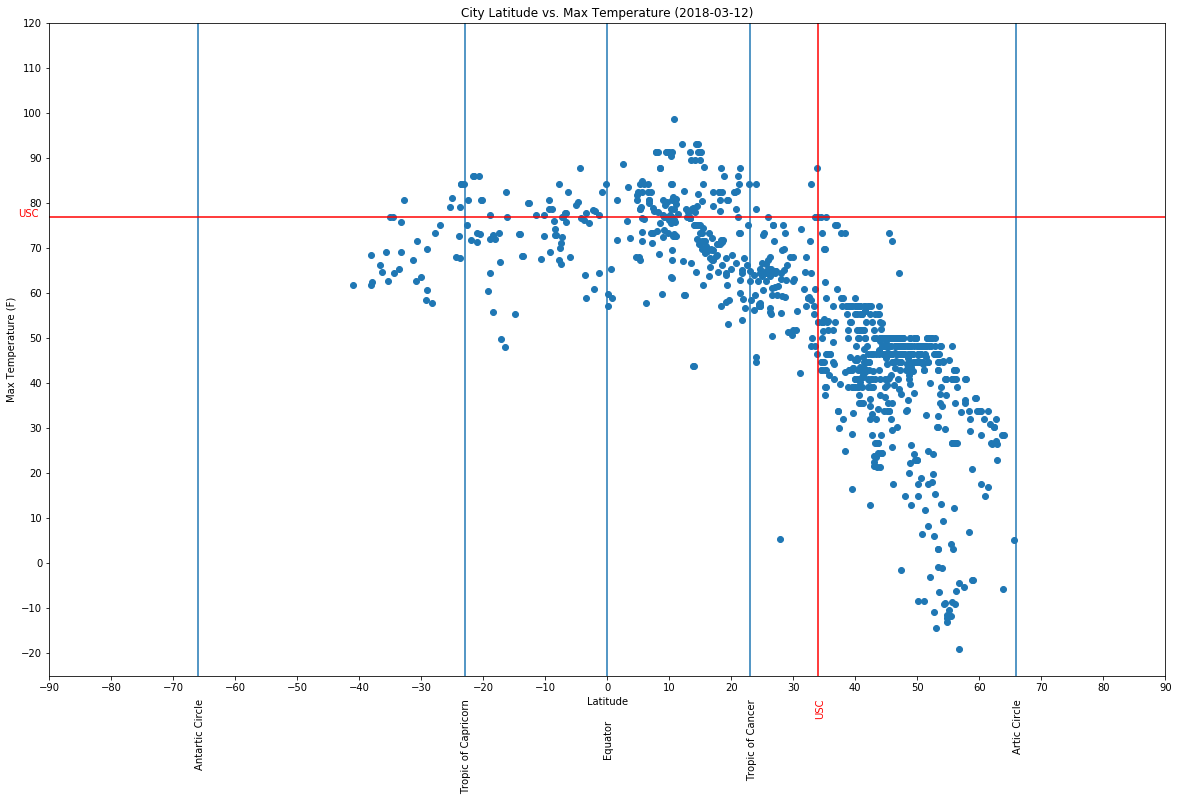

In [172]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Max Temp'])
plt.scatter(x_axis, y_axis)

# Format axis
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-20,130,10))

# Format labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (' + date_str + ')')


# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)  
vertical_location = -32
plt.text(65.5,vertical_location, 'Artic Circle', rotation=90)
plt.text(22.5,vertical_location, 'Tropic of Cancer', rotation=90)
plt.text(-0.5,vertical_location, 'Equator       ', rotation=90)
plt.text(-23.5,vertical_location, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5,vertical_location, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, vertical_location, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Max Temp'), color='red')
plt.text(-95, USC.get('Max Temp') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Humidity Plot

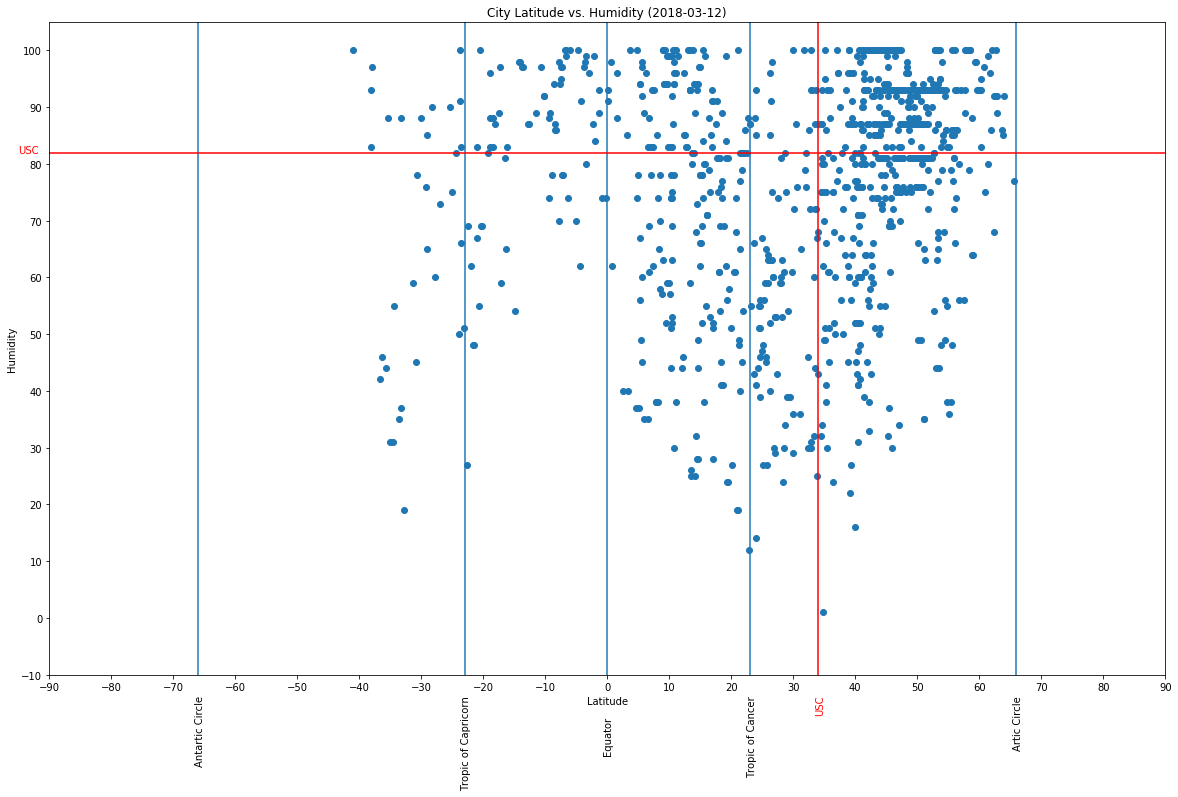

In [173]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Humidity'])
plt.scatter(x_axis, y_axis)

# Format axis.
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 110, 10))

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (' + date_str + ')')



# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5,-15, 'Artic Circle', rotation=90)
plt.text(22.5,-15, 'Tropic of Cancer', rotation=90)
plt.text(-0.5,-15, 'Equator       ', rotation=90)
plt.text(-23.5,-15, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5,-15, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -15, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Humidity'), color='red')
plt.text(-95, USC.get('Humidity') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Cloudiness Plot</h2>

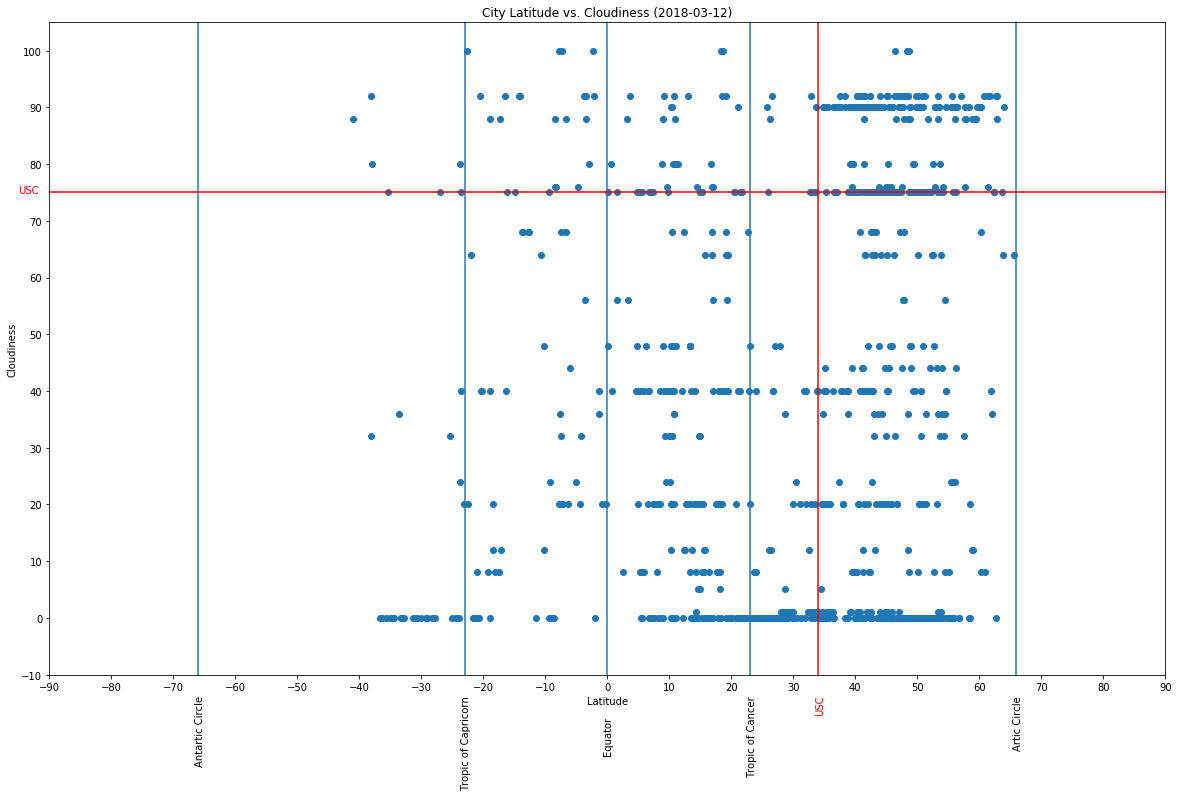

In [174]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Cloudiness'])
plt.scatter(x_axis, y_axis)

# Format axis.
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 110, 10))

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (' + date_str + ')')

# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5, -15, 'Artic Circle', rotation=90)
plt.text(22.5, -15, 'Tropic of Cancer', rotation=90)
plt.text(-0.5, -15, 'Equator       ', rotation=90)
plt.text(-23.5, -15, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5, -15, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -15, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Cloudiness'), color='red')
plt.text(-95, USC.get('Cloudiness') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Wind Speed Plot

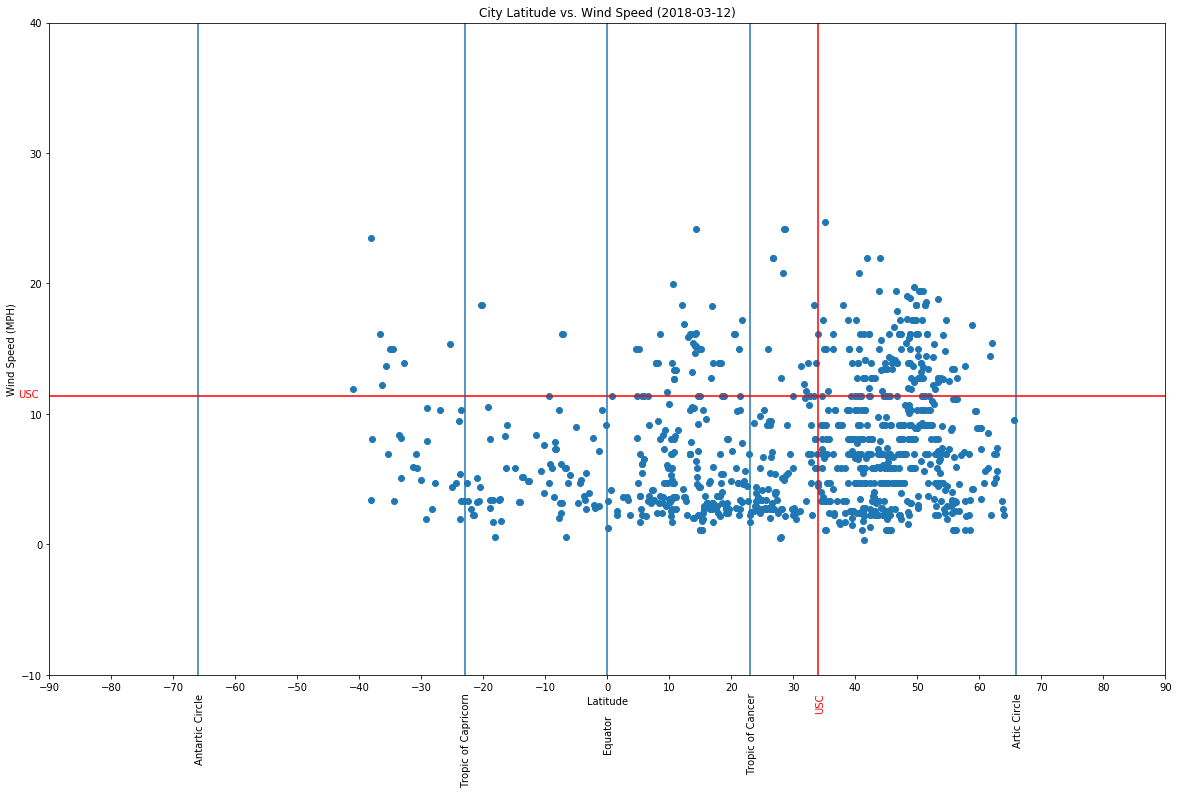

In [175]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Wind Speed'])
plt.scatter(x_axis, y_axis)

# Format axis
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 50, 10))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs. Wind Speed (' + date_str + ')')


# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5, -12, 'Artic Circle', rotation=90)
plt.text(22.5, -12, 'Tropic of Cancer', rotation=90)
plt.text(-0.5, -12, 'Equator       ', rotation=90)
plt.text(-23.5, -12, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5, -12, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -12, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Wind Speed'), color='red')
plt.text(-95, USC.get('Wind Speed') -0.1, 'USC', color='red')


plt.show()